In [1]:
import pysumma.plotting as psp
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties

In [2]:
harts_current = xr.open_dataset('/home/cdalden/summa_setup/model/output/output_harts_current_WY24_timestep.nc')
harts_current_depth    = harts_current.isel(hru=0)['iLayerHeight']
harts_current_frac_wat  = harts_current.isel(hru=0)['mLayerVolFracWat']
harts_current_frac_wat   =    harts_current_frac_wat.where((harts_current_frac_wat == -9999) | np.isnan(harts_current_frac_wat), 
                                                           harts_current_frac_wat * 1000)

harts_2K = xr.open_dataset('/home/cdalden/summa_setup/model/output/output_harts_+2K_WY24_timestep.nc')
harts_2K_depth    = harts_2K.isel(hru=0)['iLayerHeight']
harts_2K_frac_wat  = harts_2K.isel(hru=0)['mLayerVolFracWat']
harts_2K_frac_wat   =    harts_2K_frac_wat.where((harts_2K_frac_wat == -9999) | np.isnan(harts_2K_frac_wat), 
                                                 harts_2K_frac_wat * 1000)

harts_4K = xr.open_dataset('/home/cdalden/summa_setup/model/output/output_harts_+4K_WY24_timestep.nc')
harts_4K_depth    = harts_4K.isel(hru=0)['iLayerHeight']
harts_4K_frac_wat  = harts_4K.isel(hru=0)['mLayerVolFracWat']
harts_4K_frac_wat   =    harts_4K_frac_wat.where((harts_4K_frac_wat == -9999) | np.isnan(harts_4K_frac_wat), 
                                                 harts_4K_frac_wat * 1000)

snoq_current = xr.open_dataset('/home/cdalden/summa_setup/model/output/output_olallie_current_WY24_timestep.nc')
snoq_current_depth    = snoq_current.isel(hru=0)['iLayerHeight']
snoq_current_frac_wat  = snoq_current.isel(hru=0)['mLayerVolFracWat']
snoq_current_frac_wat   =    snoq_current_frac_wat.where((snoq_current_frac_wat == -9999) | np.isnan(snoq_current_frac_wat), 
                                                         snoq_current_frac_wat * 1000)

snoq_2K = xr.open_dataset('/home/cdalden/summa_setup/model/output/output_olallie_+2K_WY24_timestep.nc')
snoq_2K_depth    = snoq_2K.isel(hru=0)['iLayerHeight']
snoq_2K_frac_wat  = snoq_2K.isel(hru=0)['mLayerVolFracWat']
snoq_2K_frac_wat   =    snoq_2K_frac_wat.where((snoq_2K_frac_wat == -9999) | np.isnan(snoq_2K_frac_wat), snoq_2K_frac_wat * 1000)

snoq_4K = xr.open_dataset('/home/cdalden/summa_setup/model/output/output_olallie_+4K_WY24_timestep.nc')
snoq_4K_depth    = snoq_4K.isel(hru=0)['iLayerHeight']
snoq_4K_frac_wat  = snoq_4K.isel(hru=0)['mLayerVolFracWat']
snoq_4K_frac_wat   =    snoq_4K_frac_wat.where((snoq_4K_frac_wat == -9999) | np.isnan(snoq_4K_frac_wat), 
                                               snoq_4K_frac_wat * 1000)

In [3]:
# fig, ax = plt.subplots(3,2, figsize=(20, 15))

# psp.layers(harts_current_frac_wat, harts_current_depth, ax=ax[0,0], plot_soil=False)
# ax[0,0].plot(harts_current.time, harts_current.scalarSnowDepth, color='r')
# ax[0,0].set_ylim(0,2.7)

# psp.layers(harts_2K_frac_wat, harts_2K_depth, ax=ax[1,0], plot_soil=False)
# ax[1,0].plot(harts_2K.time, harts_2K.scalarSnowDepth, color='r')
# ax[1,0].set_ylim(0,2.7)

# psp.layers(harts_4K_frac_wat, harts_4K_depth, ax=ax[2,0], plot_soil=False)
# ax[2,0].plot(harts_4K.time, harts_4K.scalarSnowDepth, color='r')
# ax[2,0].set_ylim(0,2.7)

# psp.layers(snoq_current_frac_wat, snoq_current_depth, ax=ax[0,1], plot_soil=False)
# ax[0,1].plot(snoq_current.time, snoq_current.scalarSnowDepth, color='r')
# ax[0,1].set_ylim(0,4)

# psp.layers(snoq_2K_frac_wat, snoq_2K_depth, ax=ax[1,1], plot_soil=False)
# ax[1,1].plot(snoq_2K.time, snoq_2K.scalarSnowDepth, color='r')
# ax[1,1].set_ylim(0,4)

# psp.layers(snoq_4K_frac_wat, snoq_4K_depth, ax=ax[2,1], plot_soil=False)
# ax[2,1].plot(snoq_4K.time, snoq_4K.scalarSnowDepth, color='r')
# ax[2,1].set_ylim(0,4)

# # Create a colorbar for the entire figure
# cbar = fig.colorbar(ax[0, 0].collections[0], ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
# cbar.set_label('water fraction')
# cbar.set_clim(0.1, 0.6)

# plt.tight_layout()
# plt.show()

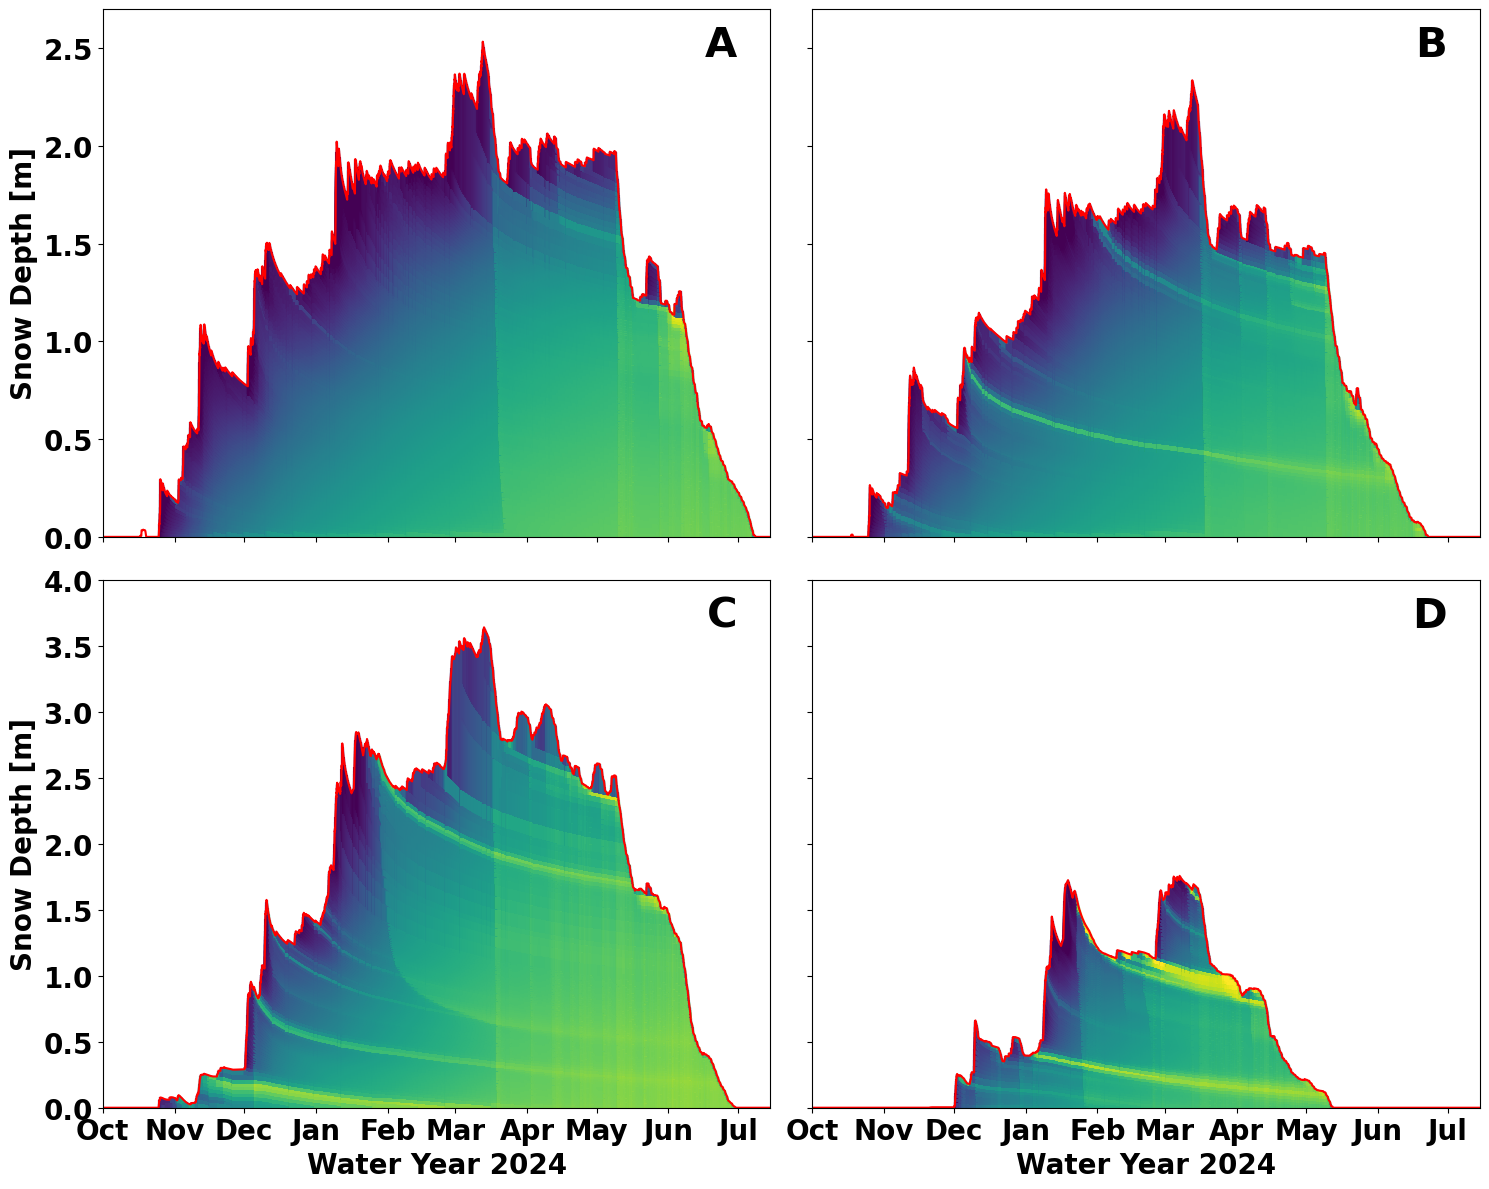

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12), sharey='row', sharex=True)

# Define the colorbar range
cbar_kwargs = {'label': 'Density [kg m-3]', 'fontweight':'bold'}
# Define the date range
start_date = pd.to_datetime('2023-10-01')
end_date = pd.to_datetime('2024-07-15')

# Plot the layers and snow depth for each subplot
psp.layers(harts_current_frac_wat, harts_current_depth, ax=ax[0, 0], 
           plot_soil=False, variable_range=[100,600], add_colorbar=False)
ax[0, 0].plot(harts_current.time, harts_current.scalarSnowDepth, color='r')
ax[0, 0].set_ylim(0, 2.7)
ax[0, 0].set_xlim(start_date, end_date)
ax[0, 0].set_ylabel('Snow Depth [m]', fontsize=20, fontweight='bold')

psp.layers(harts_2K_frac_wat, harts_2K_depth, ax=ax[0, 1], 
           plot_soil=False, variable_range=[100,600], add_colorbar=False)
ax[0, 1].plot(harts_2K.time, harts_2K.scalarSnowDepth, color='r')
ax[0, 1].set_ylim(0, 2.7)
ax[0, 1].set_xlim(start_date, end_date)

psp.layers(snoq_current_frac_wat, snoq_current_depth, ax=ax[1, 0], 
           plot_soil=False, variable_range=[100,600], add_colorbar=False)
ax[1, 0].plot(snoq_current.time, snoq_current.scalarSnowDepth, color='r')
ax[1, 0].set_ylim(0, 4)
ax[1, 0].set_xlim(start_date, end_date)
ax[1, 0].set_ylabel('Snow Depth [m]', fontsize=20, fontweight='bold')
ax[1, 0].set_xlabel('Water Year 2024', fontsize=20, fontweight='bold')

psp.layers(snoq_2K_frac_wat, snoq_2K_depth, ax=ax[1, 1], 
           plot_soil=False, variable_range=[100,600], add_colorbar=False)
ax[1, 1].plot(snoq_2K.time, snoq_2K.scalarSnowDepth, color='r')
ax[1, 1].set_ylim(0, 4)
ax[1, 1].set_xlim(start_date, end_date)
ax[1, 1].set_xlabel('Water Year 2024', fontsize=20, fontweight='bold')

# Set the date format for x-axis
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Change the fontsize and fontweight of x tick labels
font_properties = FontProperties(weight='bold', size=20)
for i in range(2):
    for j in range(2):
        for label in ax[i, j].get_xticklabels() + ax[i, j].get_yticklabels():
            label.set_fontproperties(font_properties)

# Add label 'A' to the top right of the first subplot with a white background
ax[0, 0].text(0.95, 0.97, 'A', fontsize=30, fontweight='bold', va='top', ha='right',
              transform=ax[0, 0].transAxes)

# Add label 'B' to the top right of the second subplot with a white background
ax[0, 1].text(0.95, 0.97, 'B', fontsize=30, fontweight='bold', va='top', ha='right',
              transform=ax[0, 1].transAxes)

# Add label 'C' to the top right of the third subplot with a white background
ax[1, 0].text(0.95, 0.97, 'C', fontsize=30, fontweight='bold', va='top', ha='right',
              transform=ax[1, 0].transAxes)

# Add label 'D' to the top right of the fourth subplot with a white background
ax[1, 1].text(0.95, 0.97, 'D', fontsize=30, fontweight='bold', va='top', ha='right',
              transform=ax[1, 1].transAxes)

plt.tight_layout()
# plt.show()

plt.savefig('./figures/pretty_layers_4panel.png', dpi=300, bbox_inches='tight')